In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OrdinalEncoder
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (auc, classification_report, f1_score, confusion_matrix, roc_curve, accuracy_score, precision_score, roc_auc_score)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cardata = pd.read_csv(r'/Users/user/Library/Containers/com.microsoft.Excel/Data/Downloads/UsedVehicles_data.csv')
cardata

,Body_style,Fuel_type,Make,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
0,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16430
1,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16925
2,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2710,6,164,3.31,3.19,9.0,121,4250,21,28,20970
3,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2765,6,164,3.31,3.19,9.0,121,4250,21,28,21105
4,sedan,gas,bmw,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,3.19,9.0,121,4250,20,25,24565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845
151,sedan,gas,volvo,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045
152,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485
153,sedan,diesel,volvo,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
cardata.head(10)

,Body_style,Fuel_type,Make,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
0,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16430
1,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16925
2,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2710,6,164,3.31,3.19,9.0,121,4250,21,28,20970
3,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2765,6,164,3.31,3.19,9.0,121,4250,21,28,21105
4,sedan,gas,bmw,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,3.19,9.0,121,4250,20,25,24565
5,sedan,gas,bmw,4,103.5,189.0,66.9,55.7,3230,6,209,3.62,3.39,8.0,182,5400,16,22,30760
6,sedan,gas,bmw,2,103.5,193.8,67.9,53.7,3380,6,209,3.62,3.39,8.0,182,5400,16,22,41315
7,sedan,gas,bmw,4,110.0,197.0,70.9,56.3,3505,6,209,3.62,3.39,8.0,182,5400,15,20,36880
8,hatchback,gas,honda,2,86.6,144.6,63.9,50.8,1713,4,92,2.91,3.41,9.6,58,4800,49,54,6479
9,hatchback,gas,honda,2,86.6,144.6,63.9,50.8,1819,4,92,2.91,3.41,9.2,76,6000,31,38,6855


In [4]:
cardata.describe()

,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,3.187097,99.266452,174.846452,65.970323,54.134839,2570.496774,4.406452,128.574194,3.356258,3.251742,10.540710,102.109677,5055.161290,25.529032,30.922581,13305.322581
std,0.985526,6.183905,11.870679,1.983378,2.196443,507.663867,0.909522,38.888777,0.259580,0.290660,4.473725,36.377631,498.737829,6.065990,6.557969,8111.822819
min,2.000000,86.600000,144.600000,62.500000,49.400000,1713.000000,4.000000,79.000000,2.910000,2.190000,7.000000,52.000000,4150.000000,14.000000,16.000000,5195.000000
25%,2.000000,95.700000,167.500000,64.400000,52.600000,2206.500000,4.000000,98.000000,3.150000,3.130000,8.650000,70.000000,4800.000000,21.000000,25.000000,7847.000000
50%,4.000000,97.200000,173.400000,65.500000,54.300000,2410.000000,4.000000,120.000000,3.330000,3.290000,9.000000,94.000000,5000.000000,26.000000,31.000000,10198.000000
75%,4.000000,102.650000,183.500000,66.900000,55.650000,3018.000000,4.000000,146.000000,3.620000,3.410000,9.400000,116.000000,5400.000000,30.000000,34.000000,16536.500000
max,4.000000,120.900000,208.100000,72.000000,59.100000,3900.000000,8.000000,308.000000,3.940000,3.860000,23.000000,207.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_style         155 non-null    object 
 1   Fuel_type          155 non-null    object 
 2   Make               155 non-null    object 
 3   Doors_num          155 non-null    int64  
 4   Wheelbase          155 non-null    float64
 5   Length             155 non-null    float64
 6   Width              155 non-null    float64
 7   Height             155 non-null    float64
 8   Curb_weight        155 non-null    int64  
 9   Cylinders_num      155 non-null    int64  
 10  Engine_size        155 non-null    int64  
 11  Cyl_bore           155 non-null    float64
 12  Stroke             155 non-null    float64
 13  Compression_ratio  155 non-null    float64
 14  Horsepower         155 non-null    int64  
 15  RPM                155 non-null    int64  
 16  City_mpg           155 non

In [6]:
cardata.shape

(155, 19)

In [7]:
cardata.tail()

,Body_style,Fuel_type,Make,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
150,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845
151,sedan,gas,volvo,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045
152,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485
153,sedan,diesel,volvo,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470
154,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,5400,19,25,22625


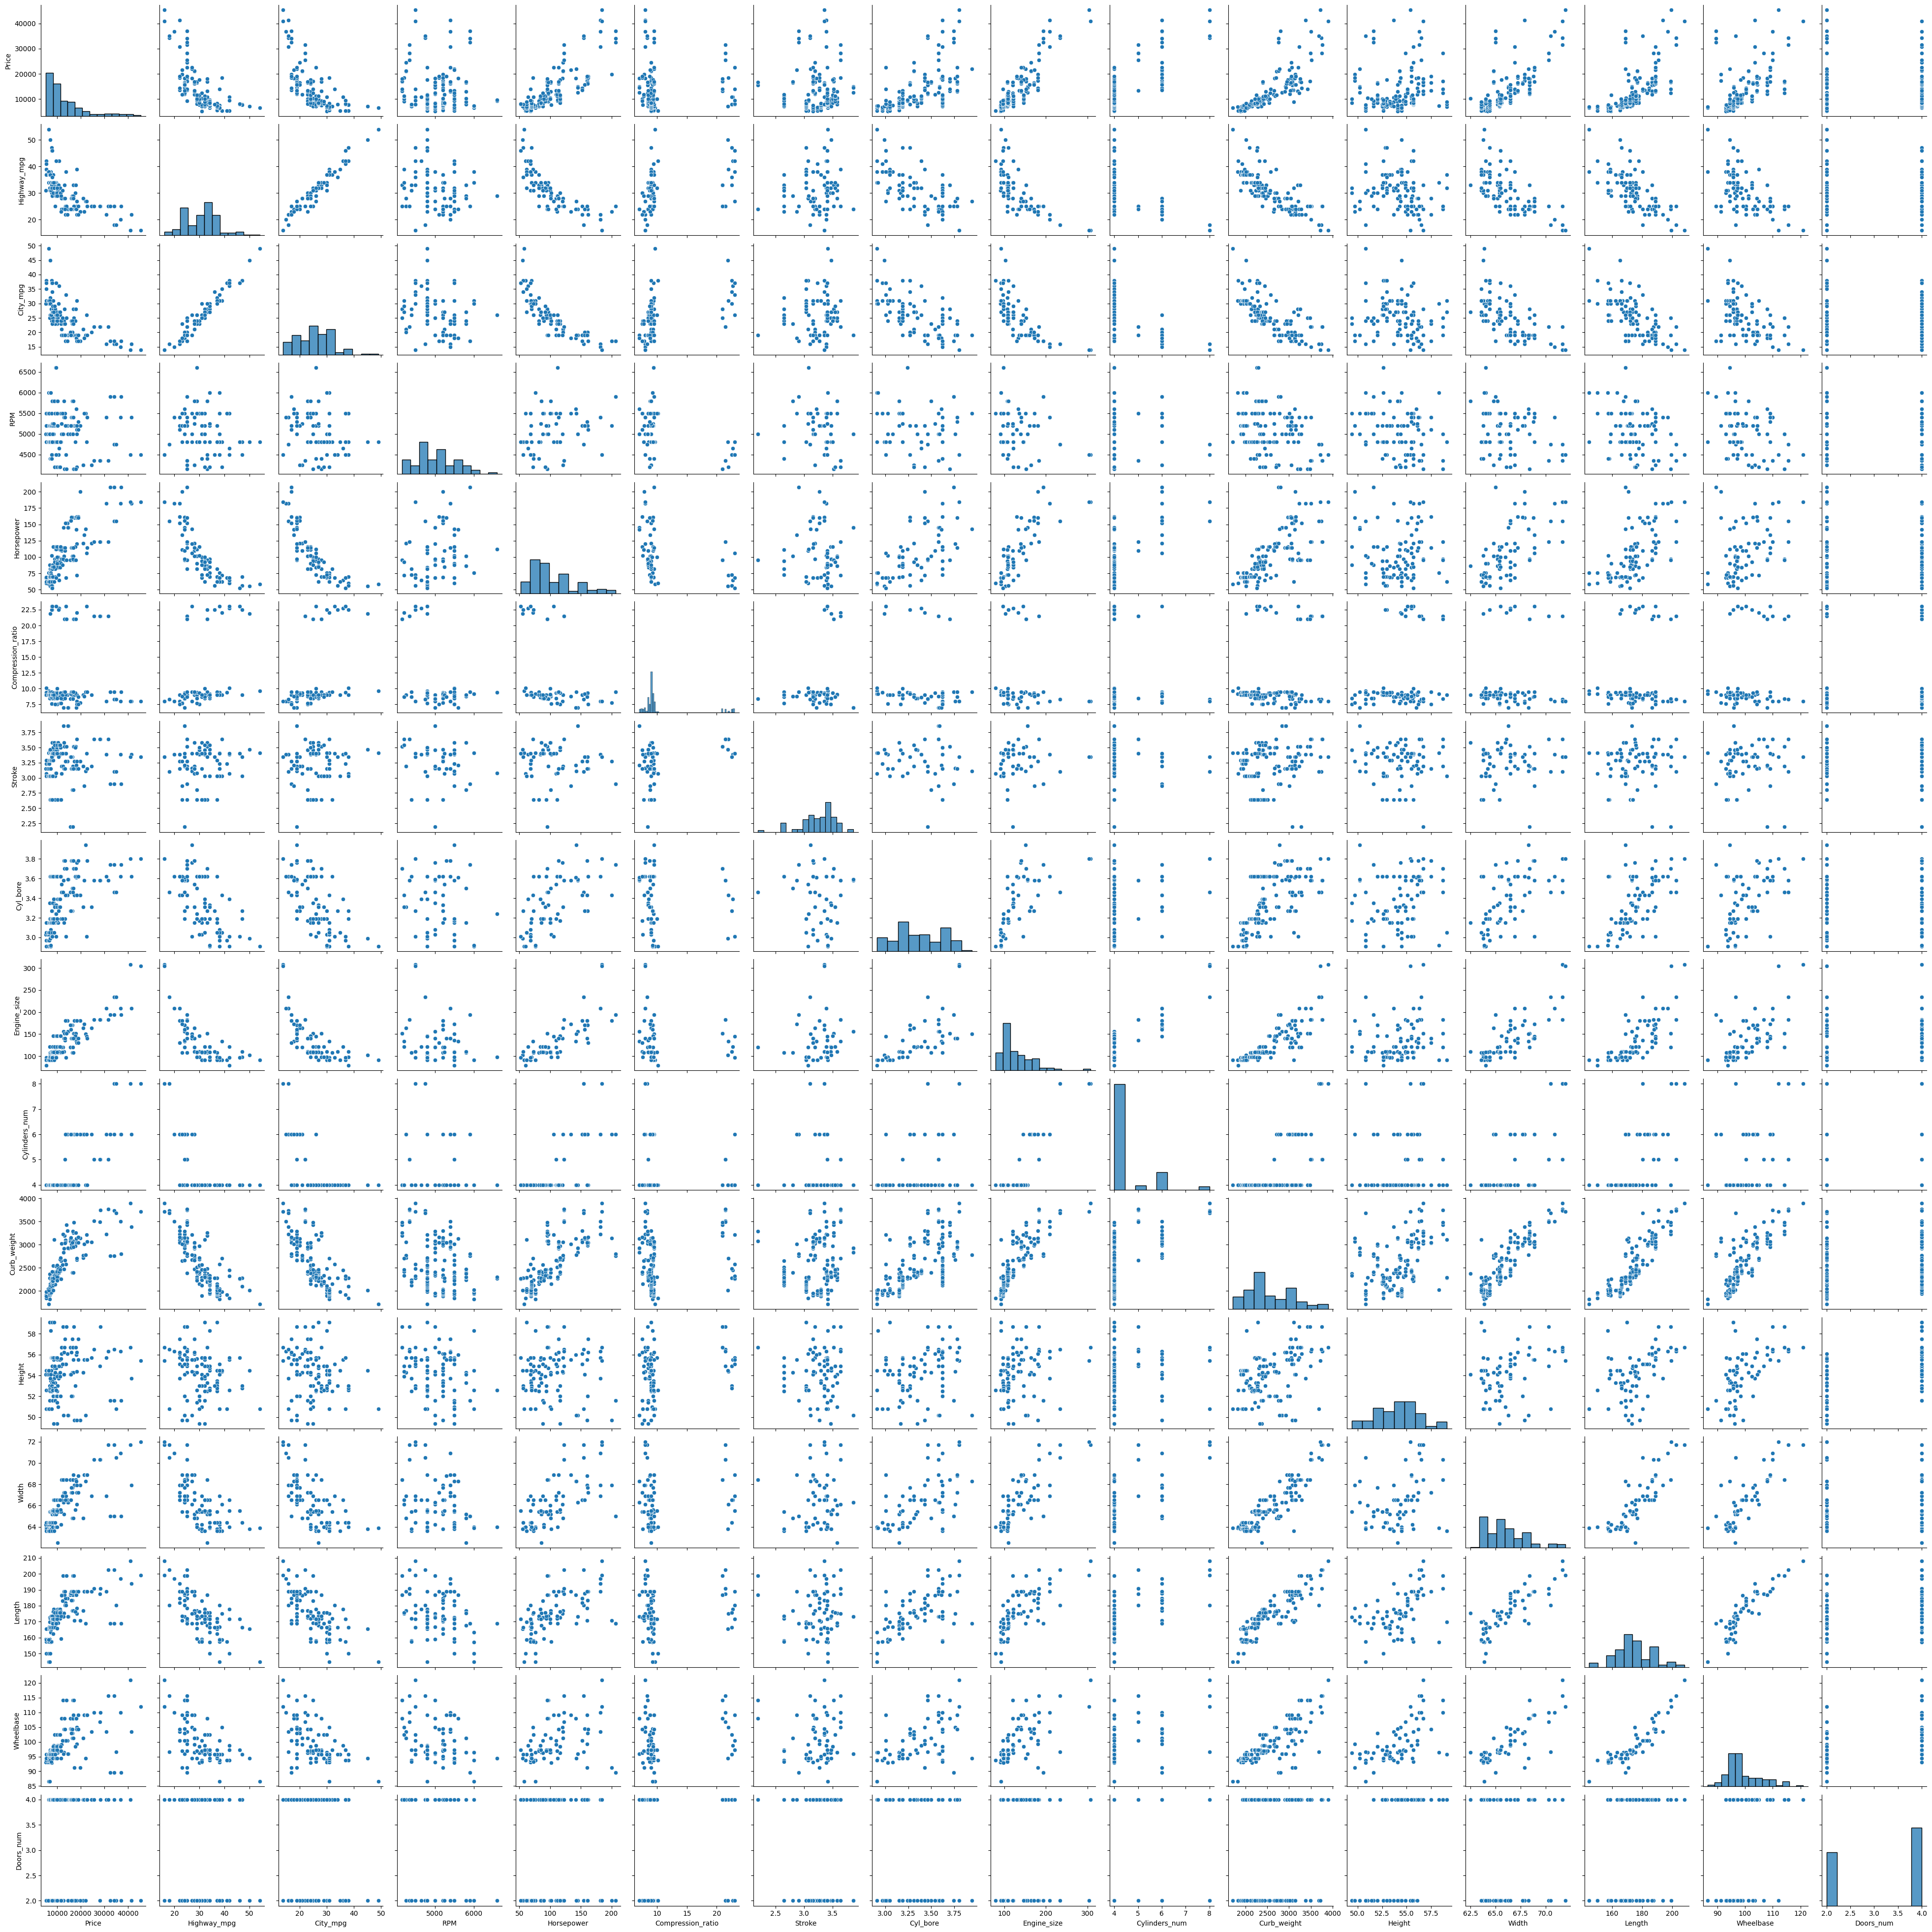

In [8]:
sns.pairplot(cardata[['Price', 'Highway_mpg', 'City_mpg', 'RPM', 'Horsepower', 'Compression_ratio', 'Stroke', 'Cyl_bore', 'Engine_size', 'Cylinders_num',
            'Curb_weight', 'Height', 'Width', 'Length', 'Wheelbase', 'Doors_num']])

<AxesSubplot: >

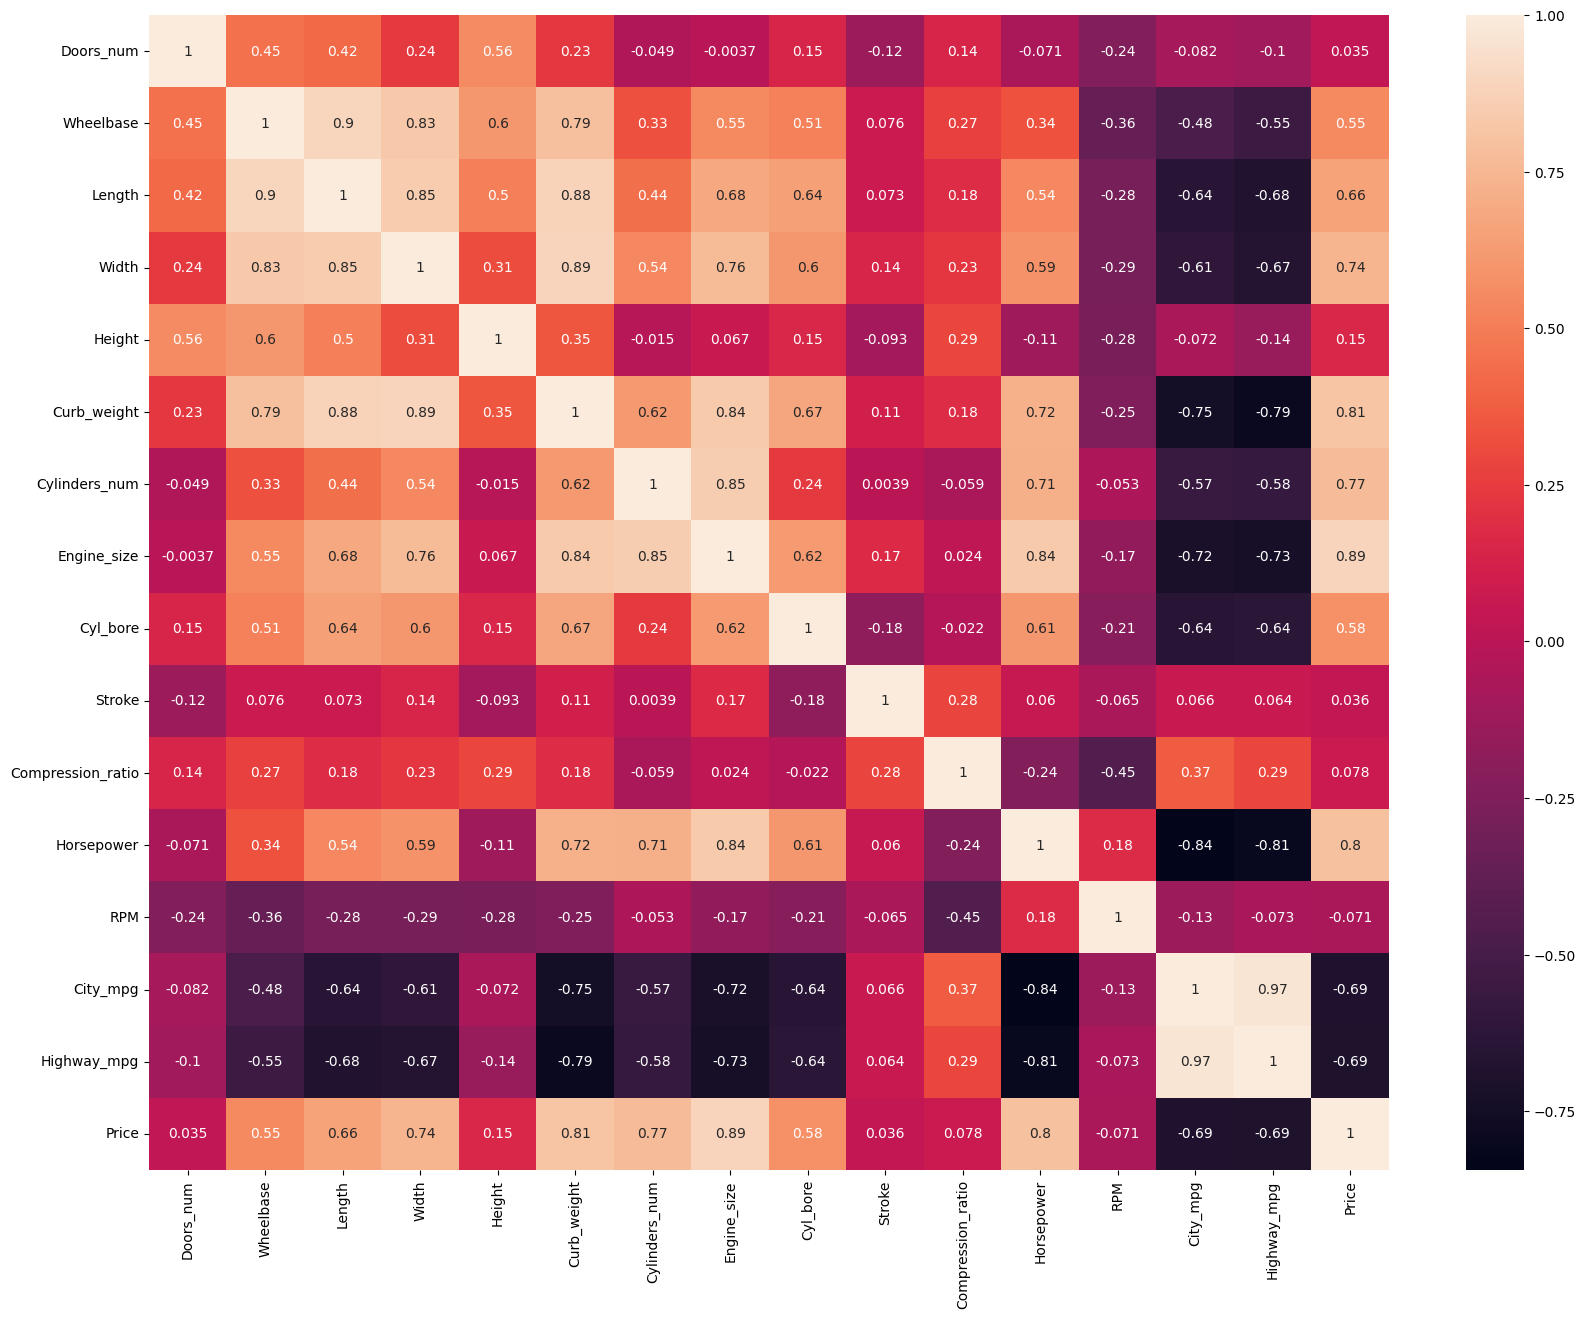

In [9]:
plt.subplots(figsize = ([20,15]))
heat_map = sns.heatmap(cardata.corr(), annot = True)
heat_map


<AxesSubplot: >

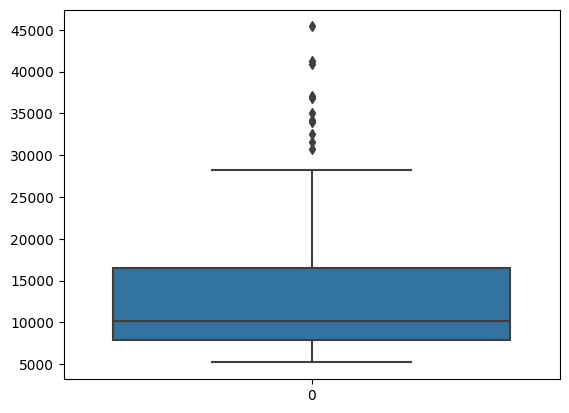

In [10]:
sns.boxplot(cardata['Price'])

<AxesSubplot: >

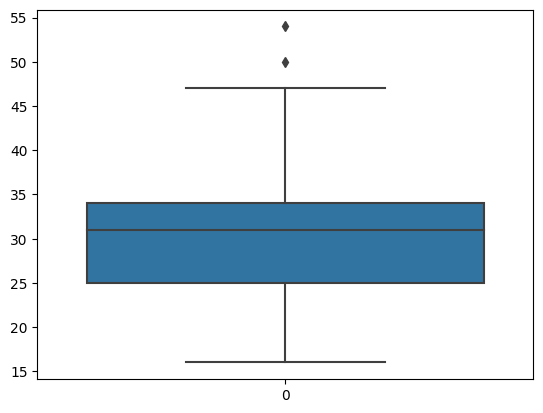

In [11]:
sns.boxplot(cardata['Highway_mpg'])

<AxesSubplot: >

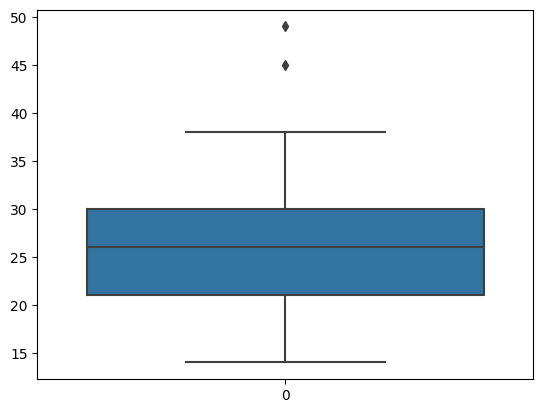

In [12]:
sns.boxplot(cardata['City_mpg'])

<AxesSubplot: >

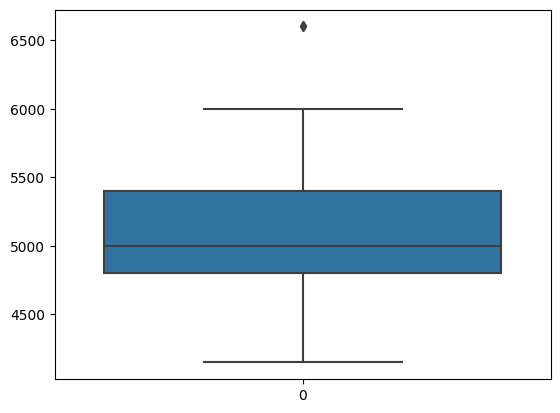

In [13]:
sns.boxplot(cardata['RPM'])

<AxesSubplot: >

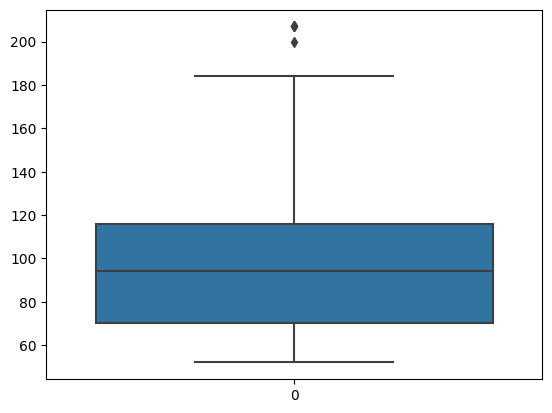

In [14]:
sns.boxplot(cardata['Horsepower'])

<AxesSubplot: >

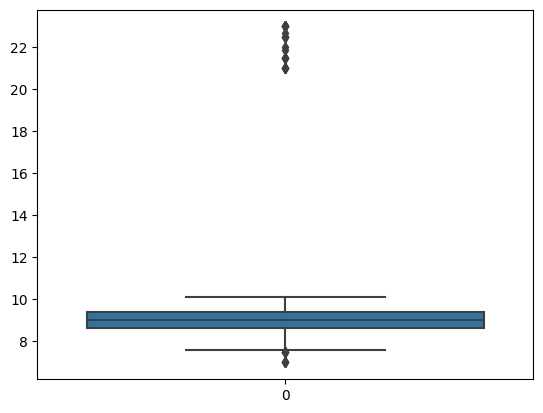

In [15]:
sns.boxplot(cardata['Compression_ratio'])

<AxesSubplot: >

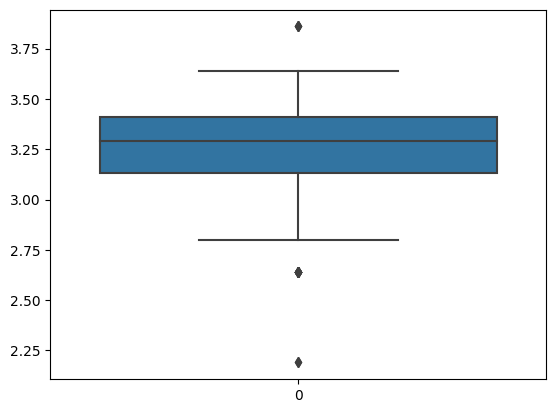

In [16]:
sns.boxplot(cardata['Stroke'])

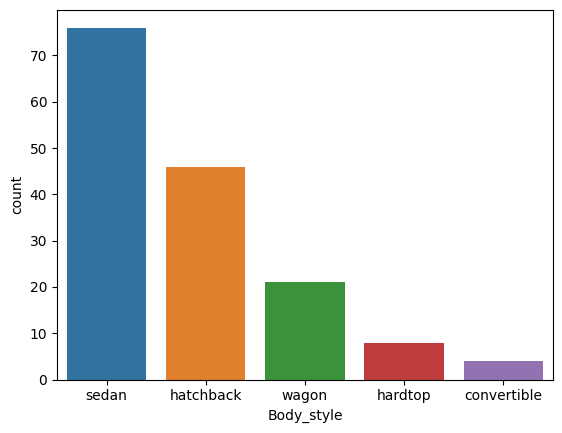

In [17]:
sns.countplot(x = 'Body_style', data = cardata)
plt.show()

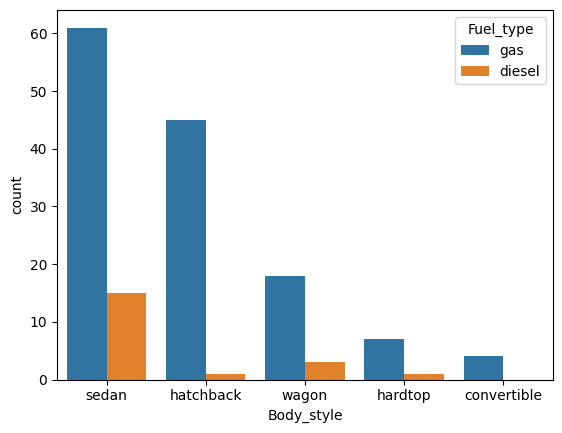

In [18]:
sns.countplot(x = 'Body_style', data = cardata, hue = 'Fuel_type')
plt.show()

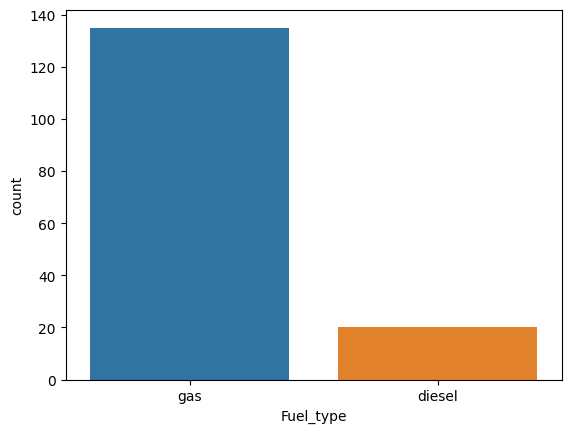

In [19]:
sns.countplot(x = 'Fuel_type', data = cardata)
plt.show()

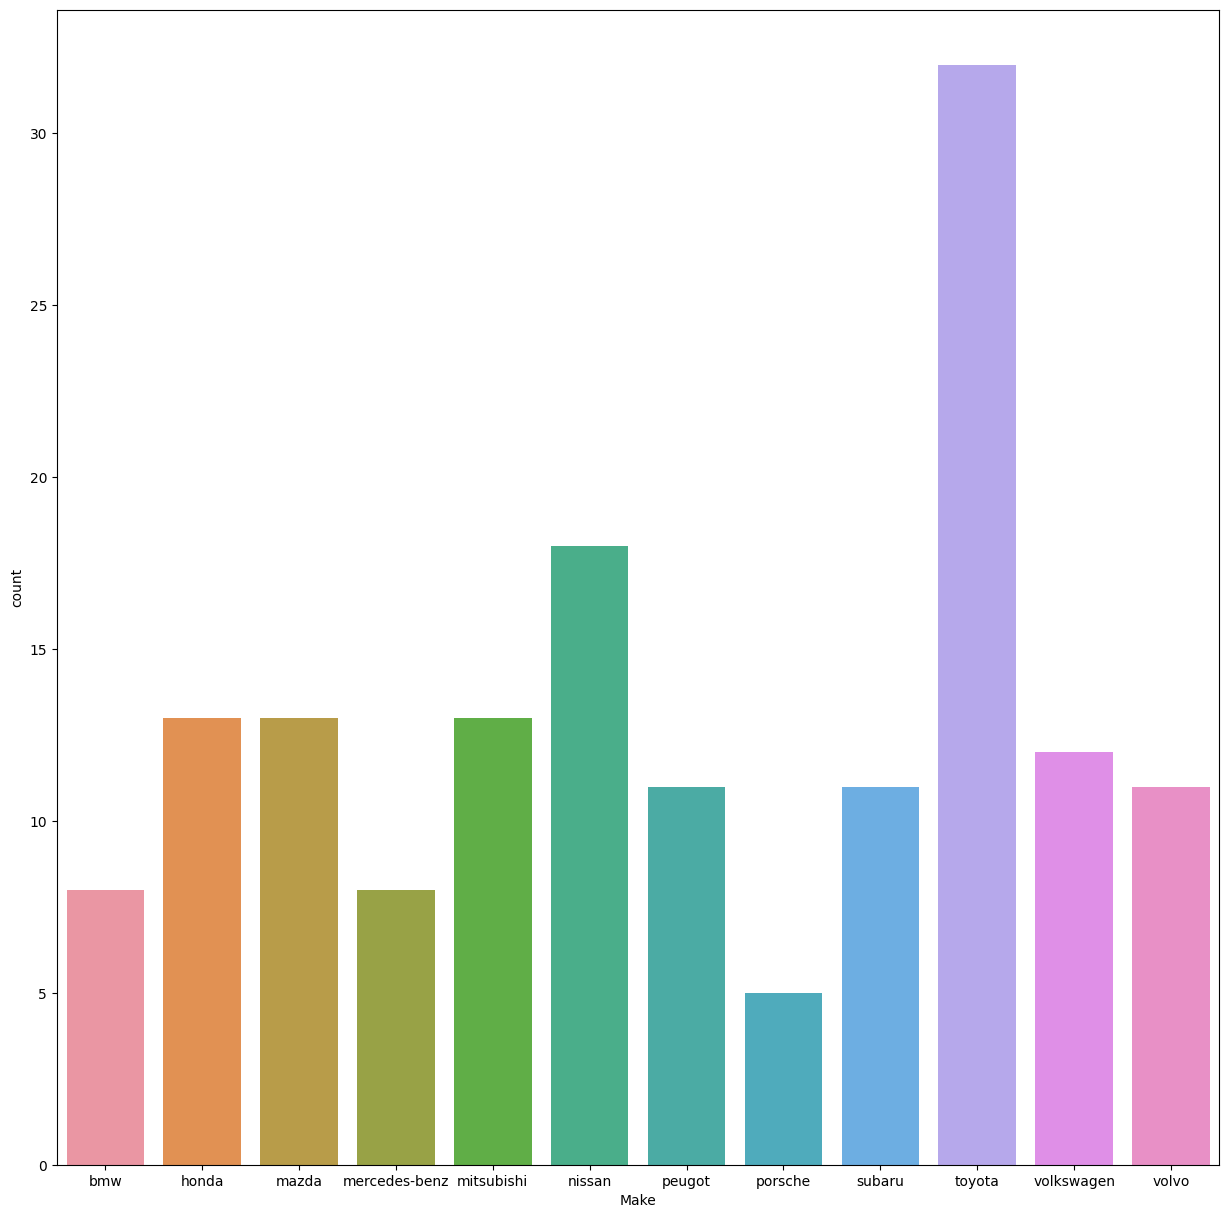

In [20]:
plt.figure(figsize = (15,15))
sns.countplot(x = 'Make', data = cardata)
plt.show()

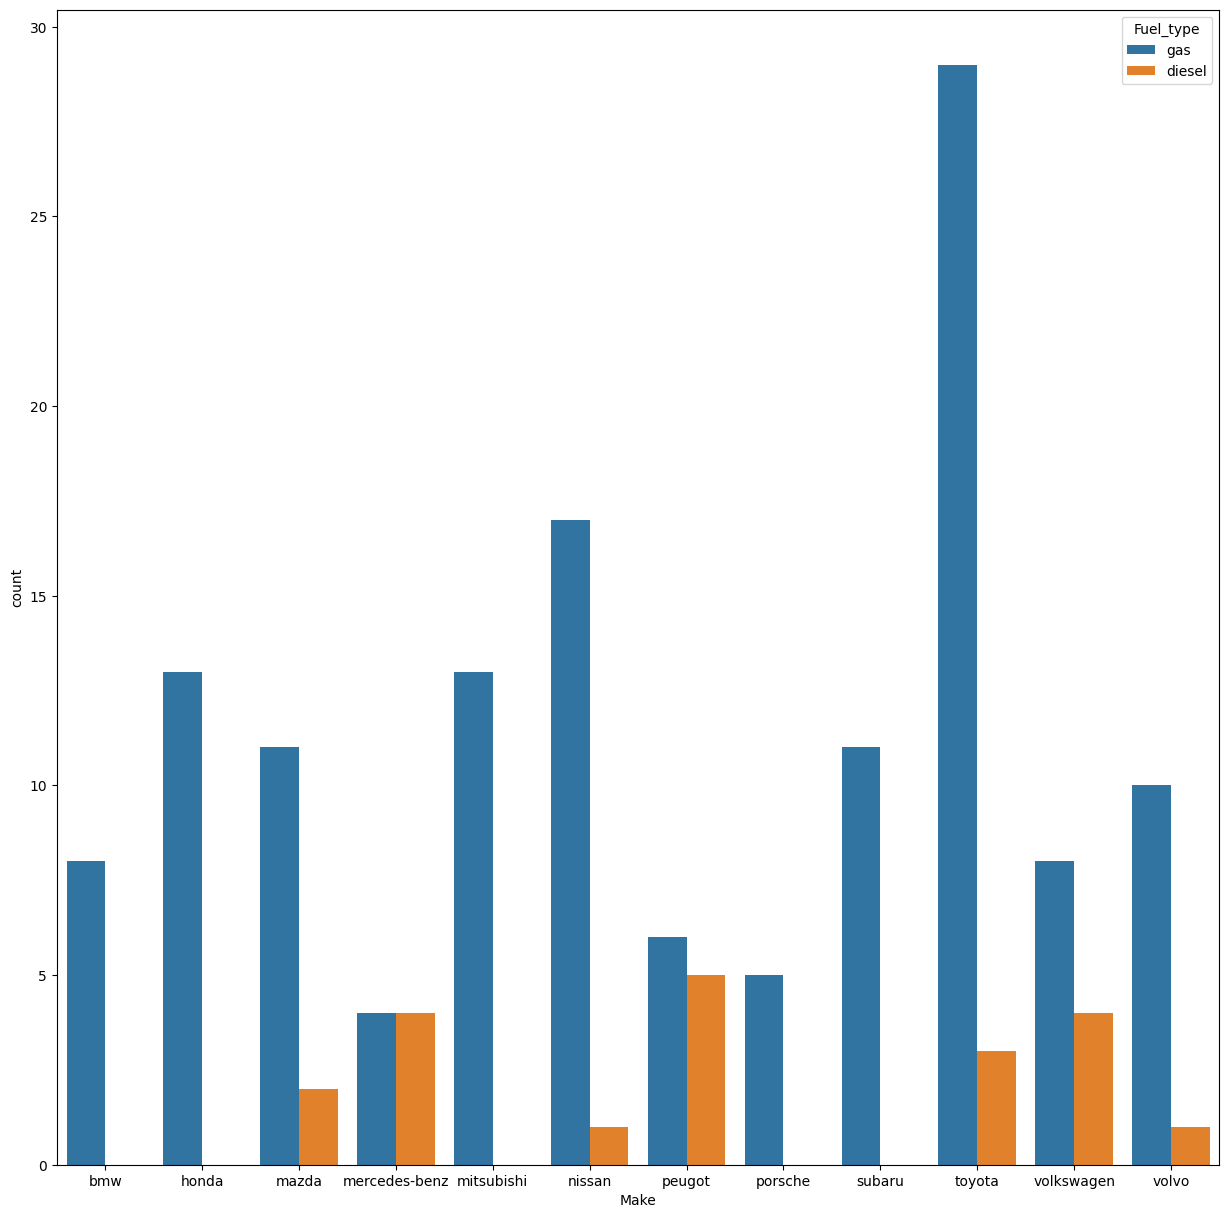

In [21]:
plt.figure(figsize = (15,15))
sns.countplot(x = 'Make', data = cardata, hue = 'Fuel_type')
plt.show()

In [22]:
#Unsupervised machine learning using KMeans clustering and Agglomerative Clustering
# KMeans clustering of City mileage and Price according to the body type of the vehicle 
cardata_new = cardata[['Body_style','City_mpg','Price']]
cardata_new


,Body_style,City_mpg,Price
0,sedan,23,16430
1,sedan,23,16925
2,sedan,21,20970
3,sedan,21,21105
4,sedan,20,24565
...,...,...,...
150,sedan,23,16845
151,sedan,19,19045
152,sedan,18,21485
153,sedan,26,22470


In [23]:
x = cardata_new.iloc[:,[1,2]]
x

,City_mpg,Price
0,23,16430
1,23,16925
2,21,20970
3,21,21105
4,20,24565
...,...,...
150,23,16845
151,19,19045
152,18,21485
153,26,22470


In [24]:
y = cardata_new.iloc[:,[0]]
y

,Body_style
0,sedan
1,sedan
2,sedan
3,sedan
4,sedan
...,...
150,sedan
151,sedan
152,sedan
153,sedan


Text(0, 0.5, 'Body_style')

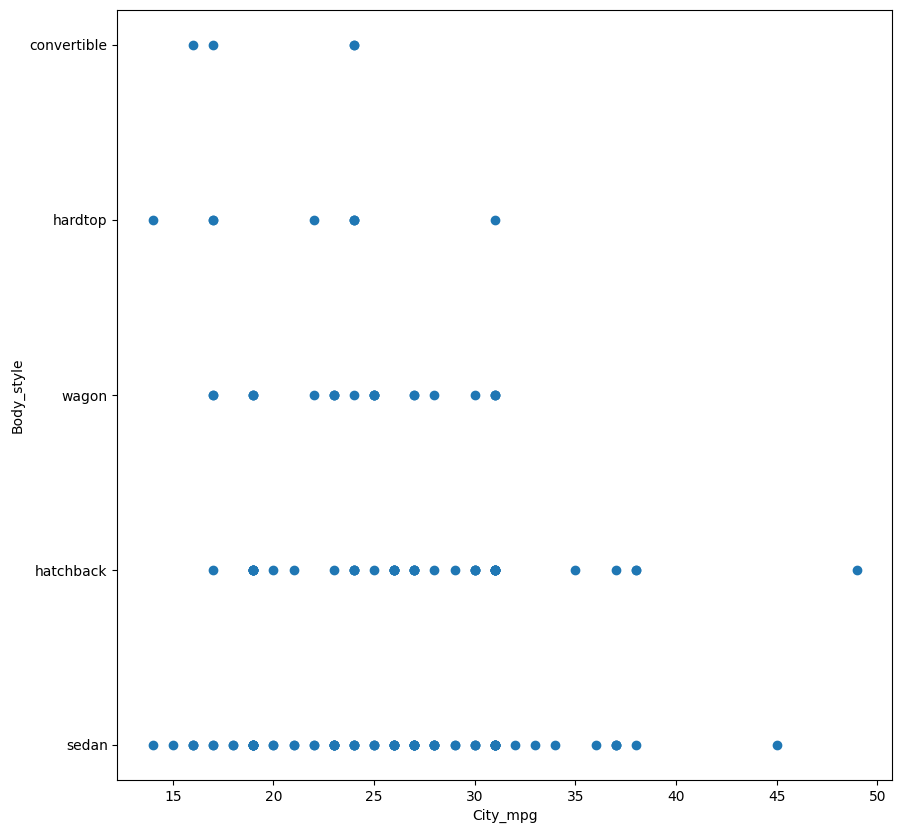

In [25]:
#visualizing with a scatterplot
plt.figure(figsize = (10,10))
plt.scatter(x['City_mpg'],y['Body_style'])
plt.xlabel('City_mpg')
plt.ylabel('Body_style')

Text(0, 0.5, 'Body_style')

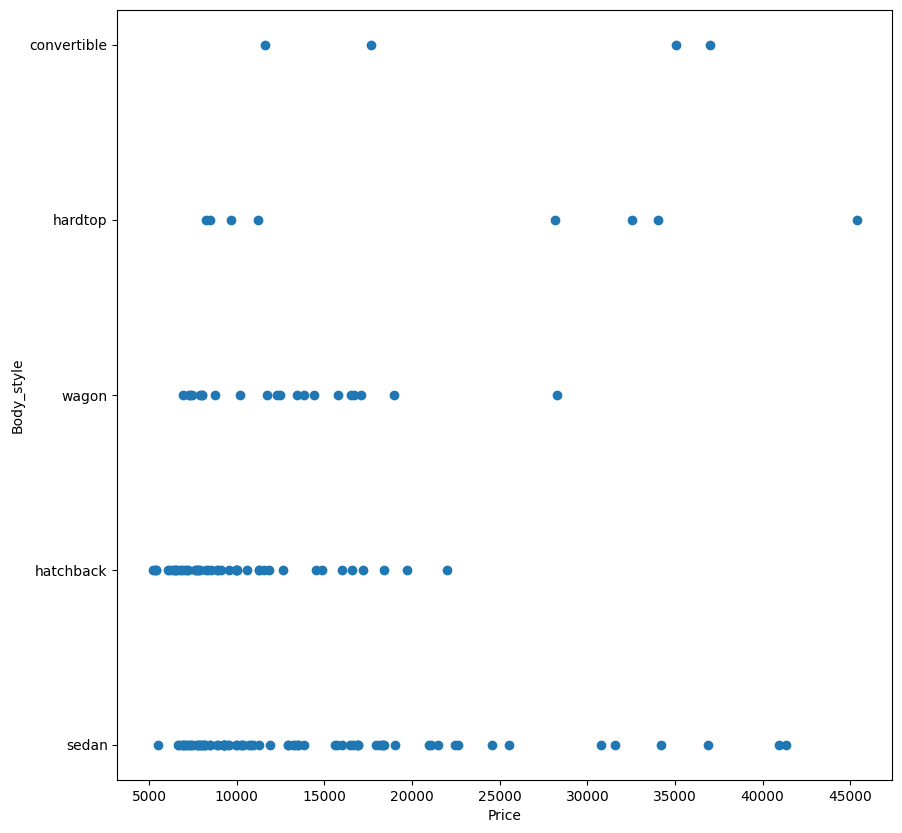

In [26]:
plt.figure(figsize = (10,10))
plt.scatter(x['Price'],y['Body_style'])
plt.xlabel('Price')
plt.ylabel('Body_style')

In [27]:
scaler = StandardScaler()
scaler.fit(x)
scaled_X = pd.DataFrame(scaler.transform(x),columns = x.columns)
scaled_X

,City_mpg,Price
0,-0.418271,0.386449
1,-0.418271,0.447669
2,-0.749047,0.947940
3,-0.749047,0.964636
4,-0.914435,1.392557
...,...,...
150,-0.418271,0.437775
151,-1.079823,0.709863
152,-1.245211,1.011634
153,0.077892,1.133455


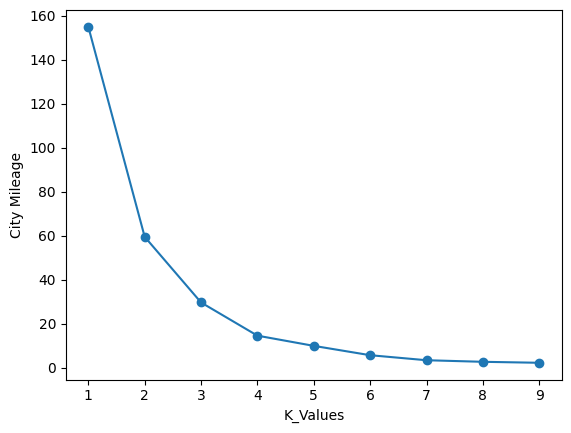

In [28]:
#plotting elbow plot for City_mpg
k_rng = range(1,10)
sse1 = []
for k1 in k_rng:
    km1 = KMeans(n_clusters = k1)
    km1.fit(scaled_X[['City_mpg']])
    sse1.append(km1.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('City Mileage')
plt.plot(k_rng,sse1,marker = 'o')

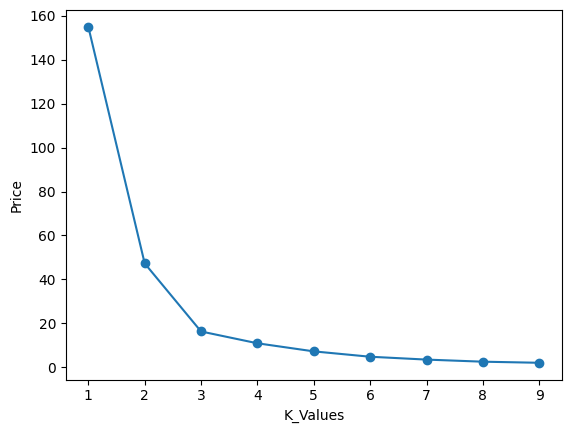

In [29]:
#Elbow plot for price
k_rng = range(1,10)
sse2 = []
for k2 in k_rng:
    km2 = KMeans(n_clusters = k2)
    km2.fit(scaled_X[['Price']])
    sse2.append(km2.inertia_)
    
plt.xlabel('K_Values')
plt.ylabel('Price')
plt.plot(k_rng,sse2,marker = 'o')

In [30]:
#KMean clustering of city mileage according to the body_style
km1 = KMeans(n_clusters = 3)
km1.fit(scaled_X[['City_mpg']])
y_predict = km1.predict(scaled_X[['City_mpg']])
clustered_cardata = pd.concat([scaled_X['City_mpg'],y['Body_style']],axis = 1)
clustered_cardata['Cluster(B vs C)'] = y_predict
clustered_cardata

,City_mpg,Body_style,Cluster(B vs C)
0,-0.418271,sedan,1
1,-0.418271,sedan,1
2,-0.749047,sedan,0
3,-0.749047,sedan,0
4,-0.914435,sedan,0
...,...,...,...
150,-0.418271,sedan,1
151,-1.079823,sedan,0
152,-1.245211,sedan,0
153,0.077892,sedan,1


Text(0, 0.5, 'Body_style')

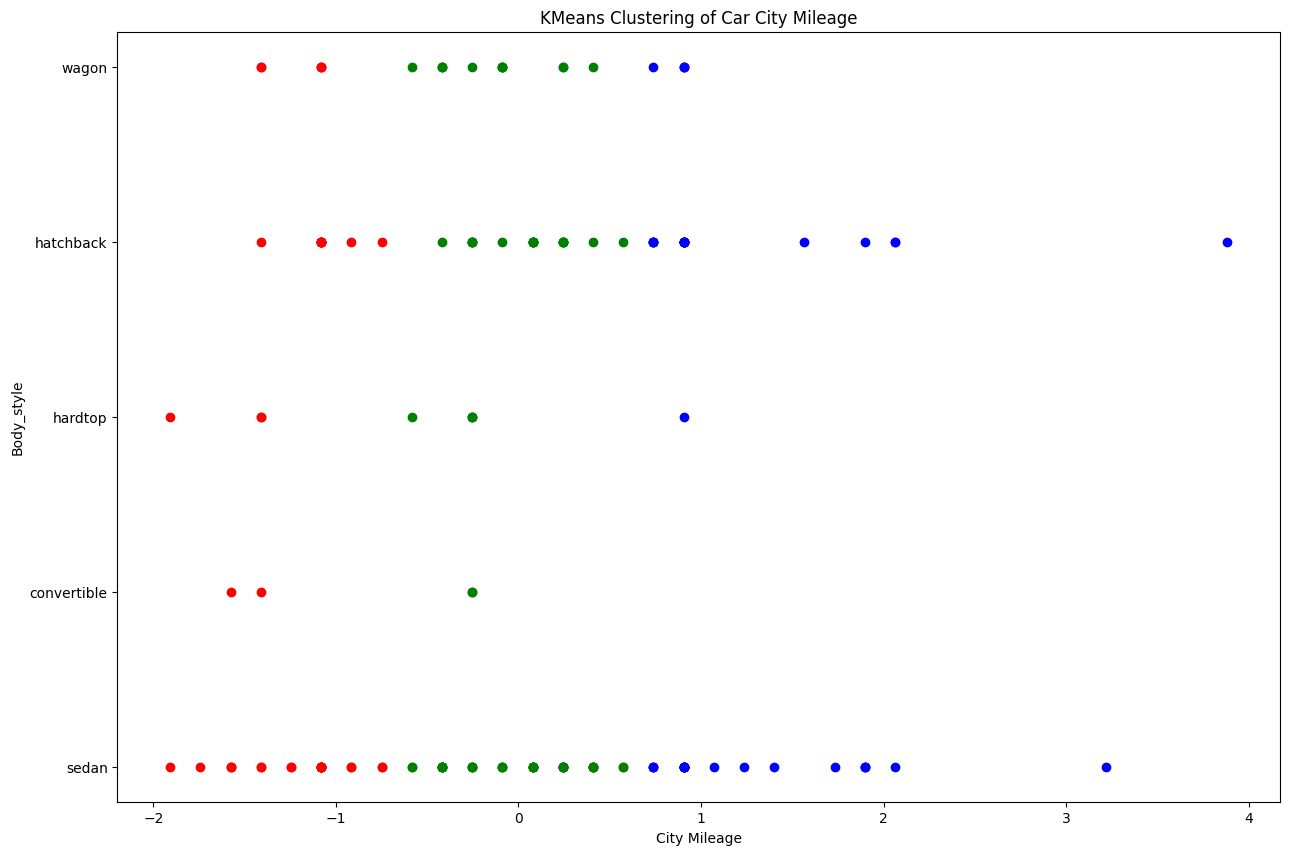

In [31]:
MC_df1 = clustered_cardata[clustered_cardata['Cluster(B vs C)'] == 0]
MC_df2 = clustered_cardata[clustered_cardata['Cluster(B vs C)'] == 1]
MC_df3 = clustered_cardata[clustered_cardata['Cluster(B vs C)'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(MC_df1['City_mpg'],MC_df1['Body_style'],color = 'red')
plt.scatter(MC_df2['City_mpg'],MC_df2['Body_style'],color = 'green')
plt.scatter(MC_df3['City_mpg'],MC_df3['Body_style'],color = 'blue')
plt.title('KMeans Clustering of Car City Mileage')
plt.xlabel('City Mileage')
plt.ylabel('Body_style')

In [32]:
km2 = KMeans(n_clusters = 3)
km2.fit(scaled_X[['Price']])
y_predict = km2.predict(scaled_X[['Price']])
clustered_cardata2 = pd.concat([scaled_X['Price'],y['Body_style']],axis = 1)
clustered_cardata2['Cluster(B vs P)'] = y_predict
clustered_cardata2

,Price,Body_style,Cluster(B vs P)
0,0.386449,sedan,2
1,0.447669,sedan,2
2,0.947940,sedan,2
3,0.964636,sedan,2
4,1.392557,sedan,2
...,...,...,...
150,0.437775,sedan,2
151,0.709863,sedan,2
152,1.011634,sedan,2
153,1.133455,sedan,2


Text(0, 0.5, 'Body_style')

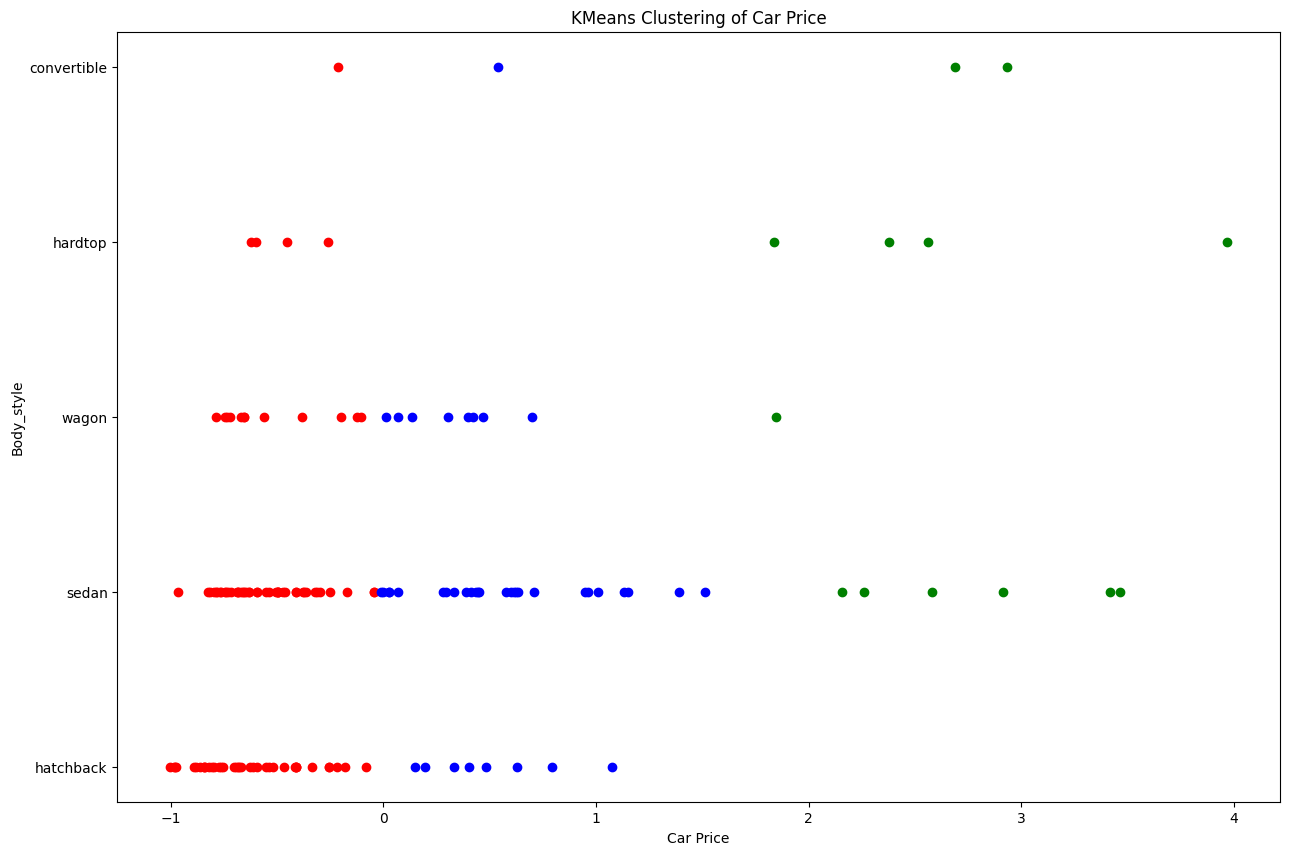

In [33]:
BP_df1 = clustered_cardata2[clustered_cardata2['Cluster(B vs P)'] == 0]
BP_df2 = clustered_cardata2[clustered_cardata2['Cluster(B vs P)'] == 1]
BP_df3 = clustered_cardata2[clustered_cardata2['Cluster(B vs P)'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(BP_df1['Price'],BP_df1['Body_style'],color = 'red')
plt.scatter(BP_df2['Price'],BP_df2['Body_style'],color = 'green')
plt.scatter(BP_df3['Price'],BP_df3['Body_style'],color = 'blue')
plt.title('KMeans Clustering of Car Price')
plt.xlabel('Car Price')
plt.ylabel('Body_style')

Text(0, 0.5, 'Euclidean Distance')

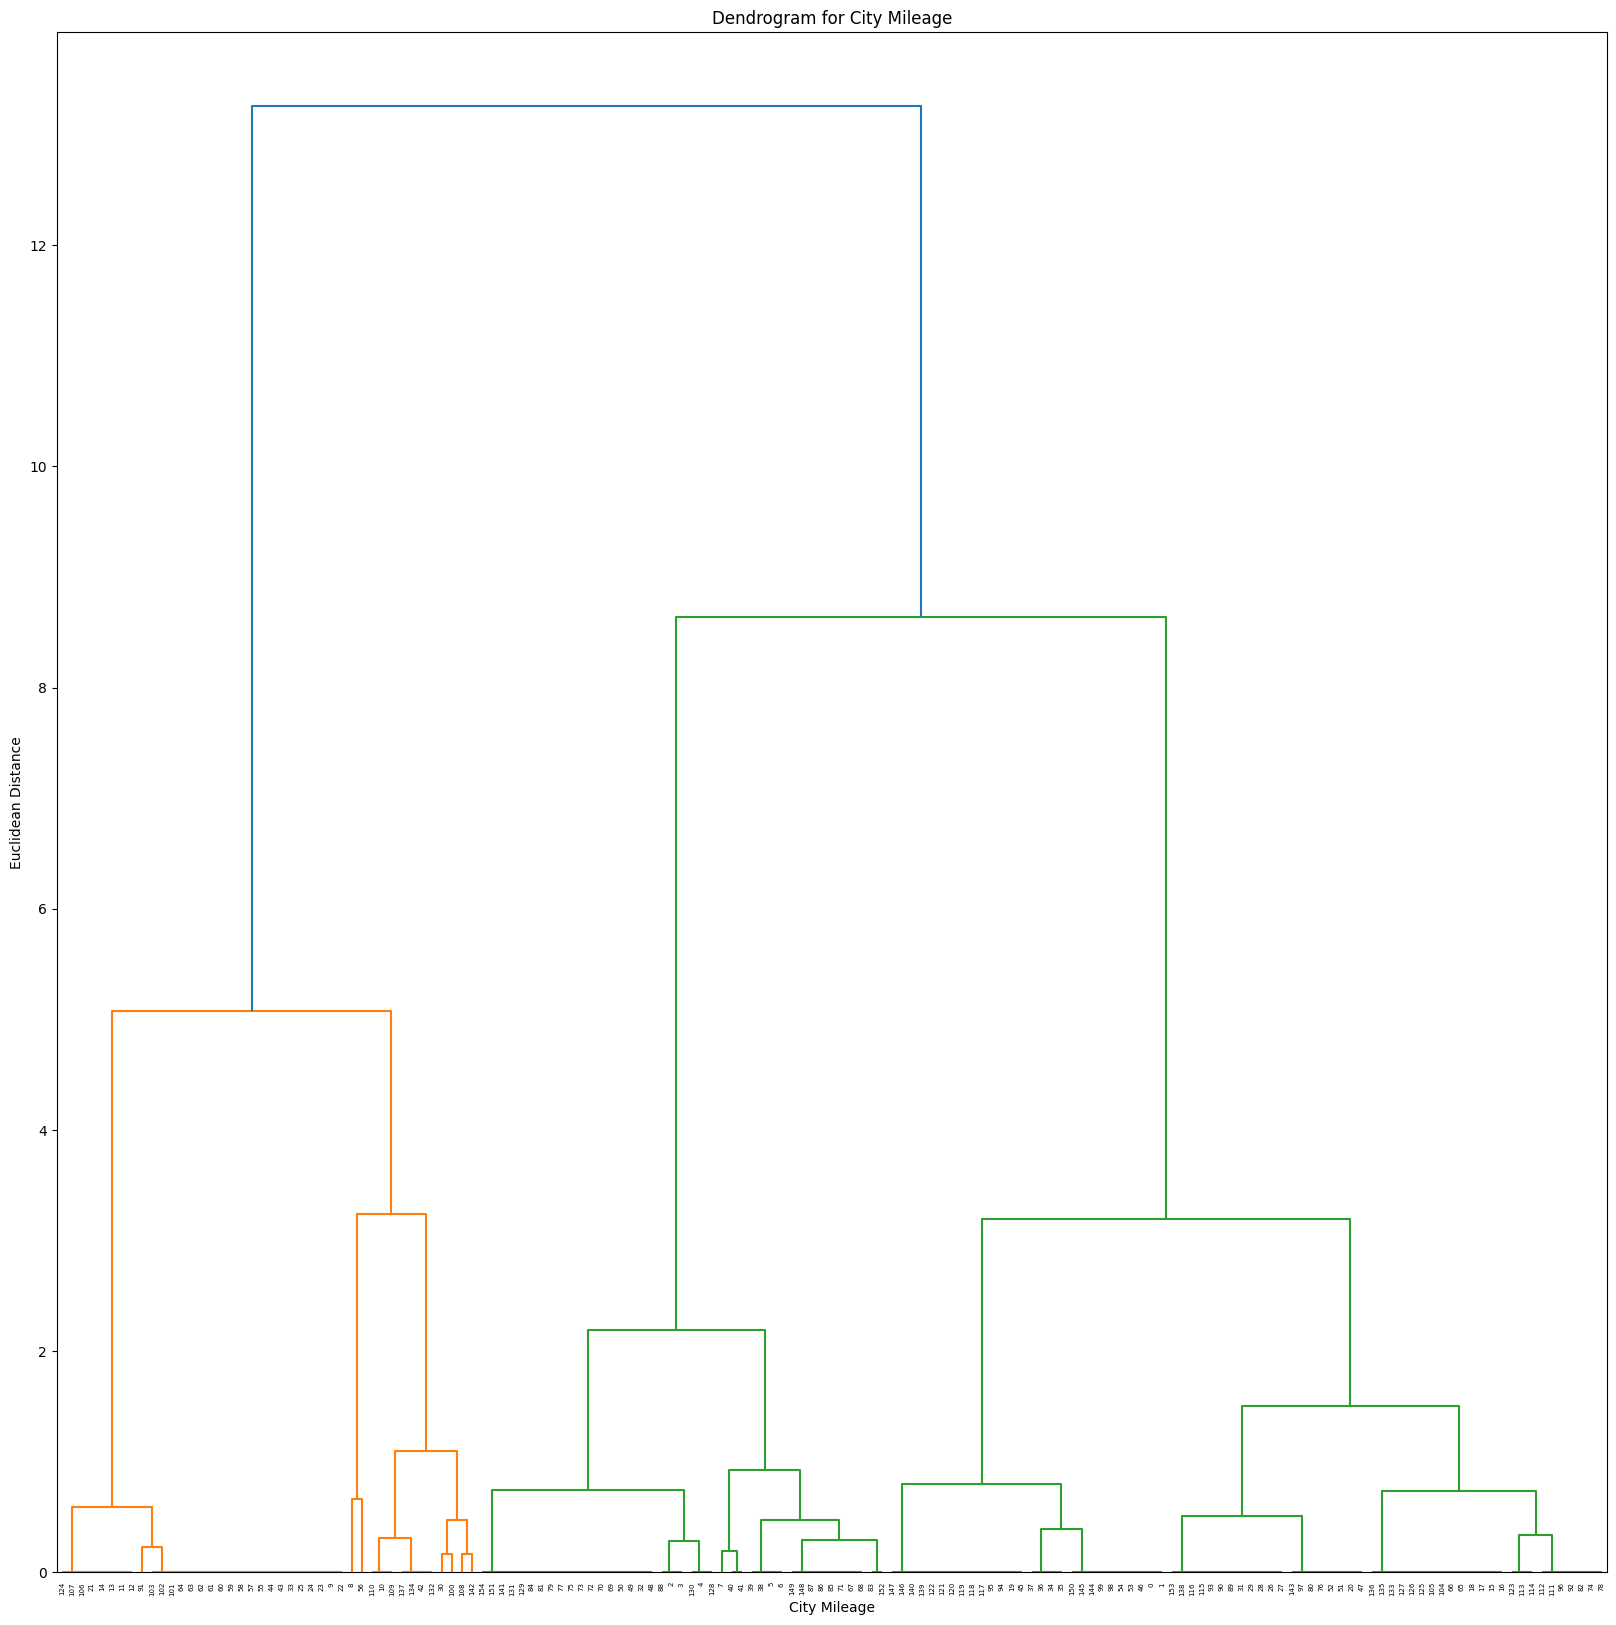

In [34]:
#Agglomerative clustering of City mileage and Price according to the body type of the vehicle 
#Dendrogram for the city mileage of the vehicle
plt.figure(figsize = (20,20))
dendrograms = sch.dendrogram(sch.linkage(scaled_X[['City_mpg']],method = 'ward'))
plt.title('Dendrogram for City Mileage')
plt.xlabel('City Mileage')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean Distance')

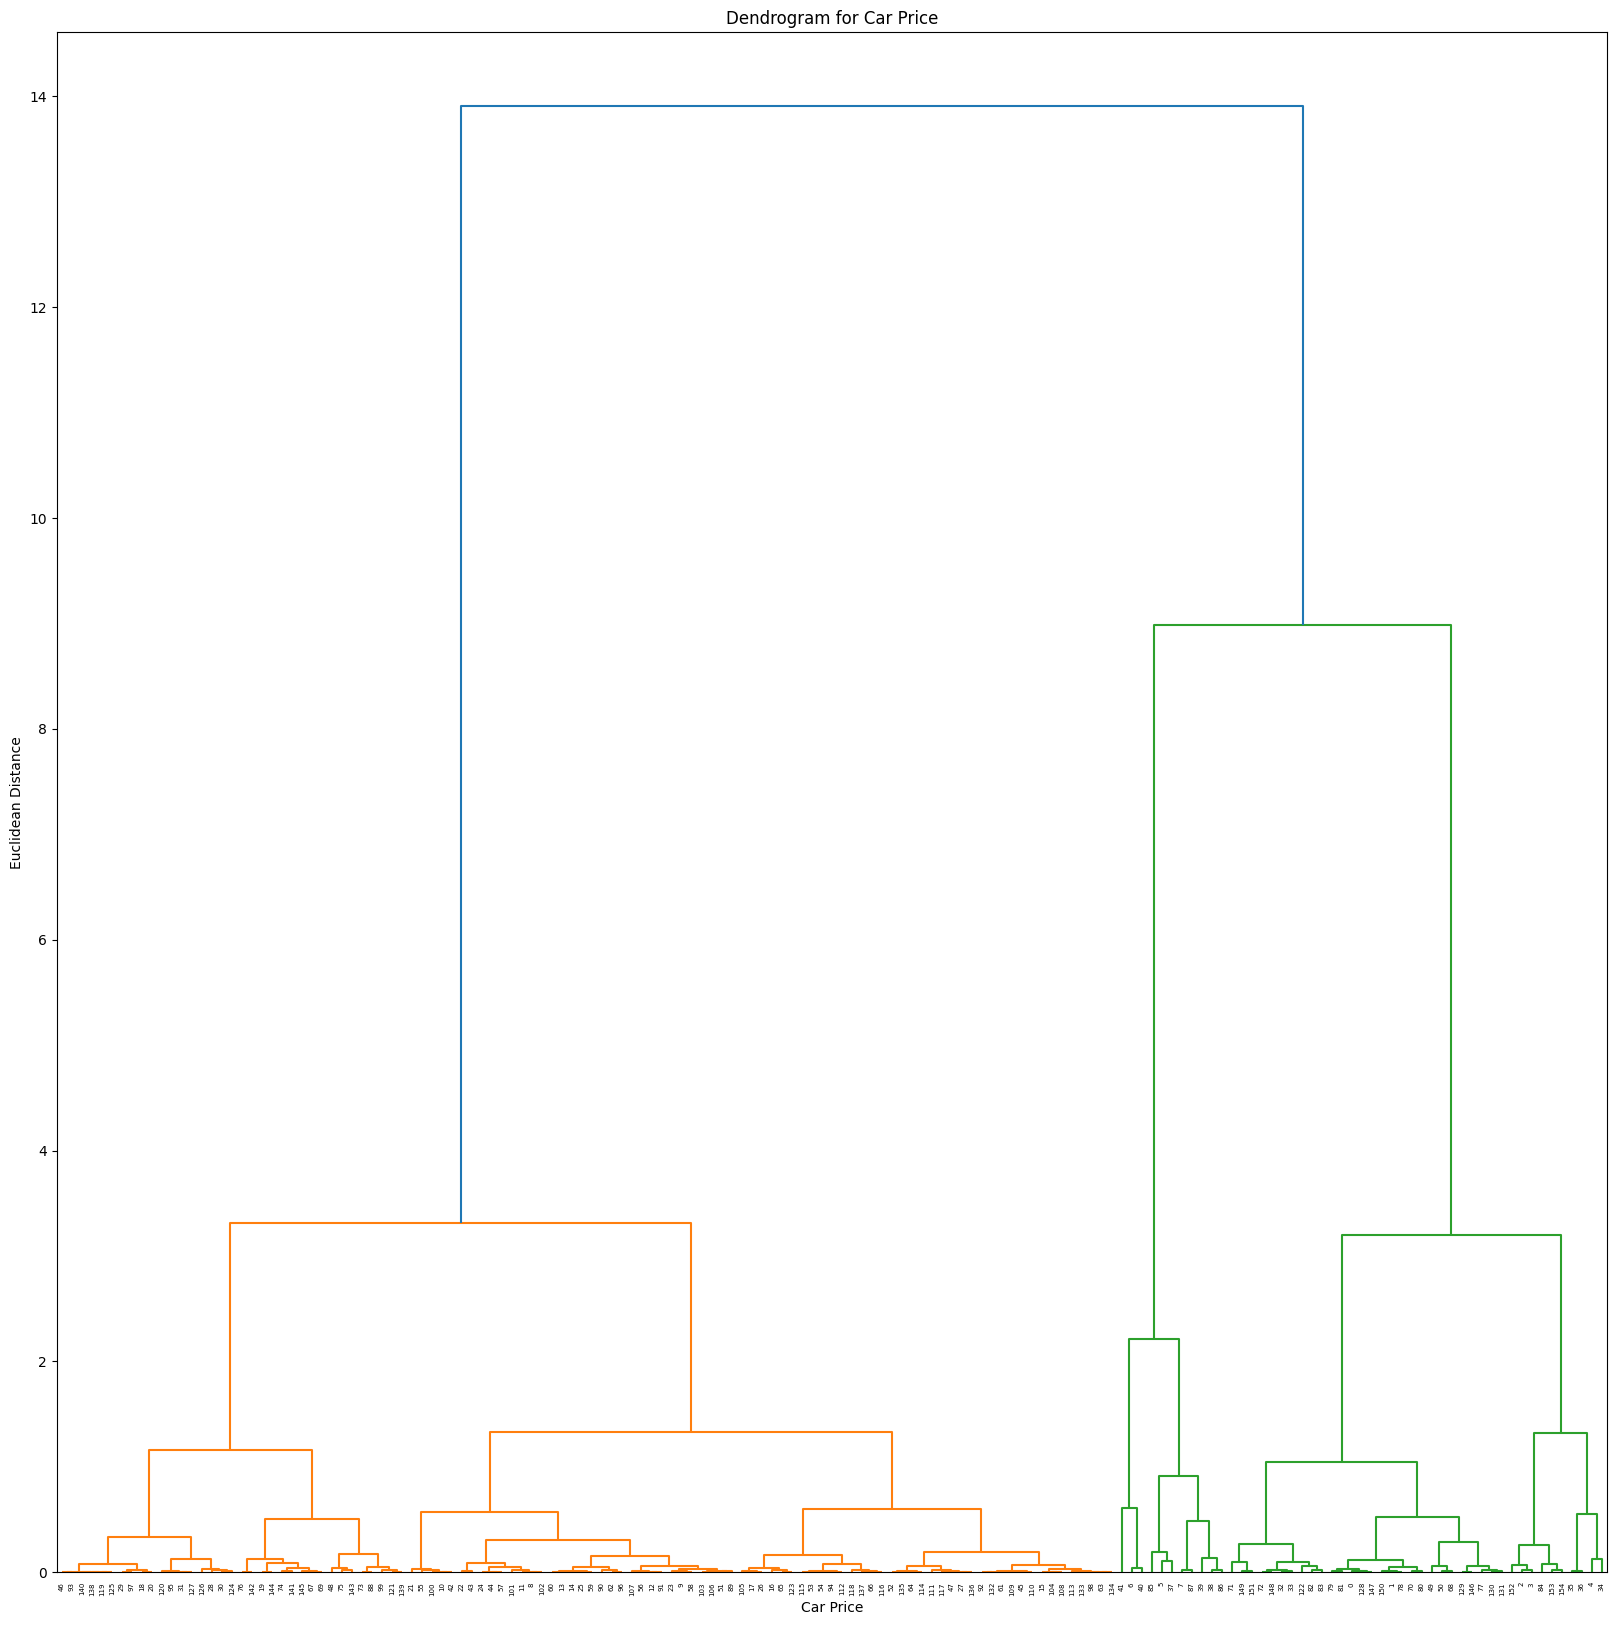

In [35]:
#Dendrogram for the price of the vehicles
plt.figure(figsize = (20,20))
dendrograms = sch.dendrogram(sch.linkage(scaled_X[['Price']],method = 'ward'))
plt.title('Dendrogram for Car Price')
plt.xlabel('Car Price')
plt.ylabel('Euclidean Distance')

In [36]:
#Agglomerative clustering algorithm on city_mileage
ac = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
ac_predict_mpg = ac.fit_predict(scaled_X[['City_mpg']])
mpg = pd.concat([scaled_X['City_mpg'],y['Body_style']],axis = 1)
mpg['Clusters'] = ac_predict_mpg
mpg

,City_mpg,Body_style,Clusters
0,-0.418271,sedan,1
1,-0.418271,sedan,1
2,-0.749047,sedan,2
3,-0.749047,sedan,2
4,-0.914435,sedan,2
...,...,...,...
150,-0.418271,sedan,1
151,-1.079823,sedan,2
152,-1.245211,sedan,2
153,0.077892,sedan,1


In [37]:
#Agglomerative clustering algorithm on vehicle price
pc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
pc_predict_price = pc.fit_predict(scaled_X[['Price']])
price = pd.concat([scaled_X['Price'],y['Body_style']],axis = 1)
price['Clusters'] = pc_predict_price
price

,Price,Body_style,Clusters
0,0.386449,sedan,1
1,0.447669,sedan,1
2,0.947940,sedan,1
3,0.964636,sedan,1
4,1.392557,sedan,1
...,...,...,...
150,0.437775,sedan,1
151,0.709863,sedan,1
152,1.011634,sedan,1
153,1.133455,sedan,1


Text(0, 0.5, 'Body_style')

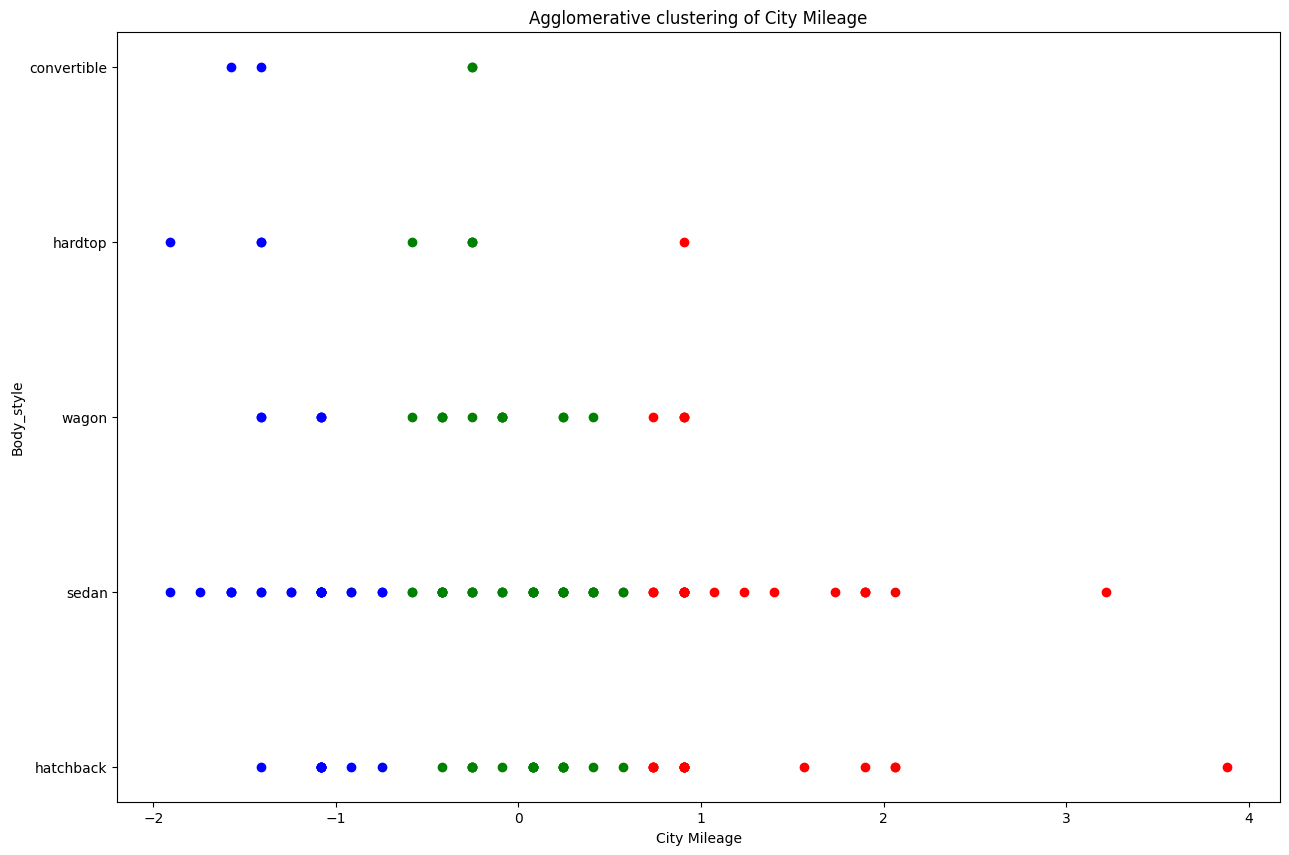

In [38]:
mpg1 = mpg[mpg['Clusters'] == 0]
mpg2 = mpg[mpg['Clusters'] == 1]
mpg3 = mpg[mpg['Clusters'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(mpg1['City_mpg'],mpg1['Body_style'],color = 'red')
plt.scatter(mpg2['City_mpg'],mpg2['Body_style'],color = 'green')
plt.scatter(mpg3['City_mpg'],mpg3['Body_style'],color = 'blue')
plt.title('Agglomerative clustering of City Mileage')
plt.xlabel('City Mileage')
plt.ylabel('Body_style')


Text(0, 0.5, 'Body_style')

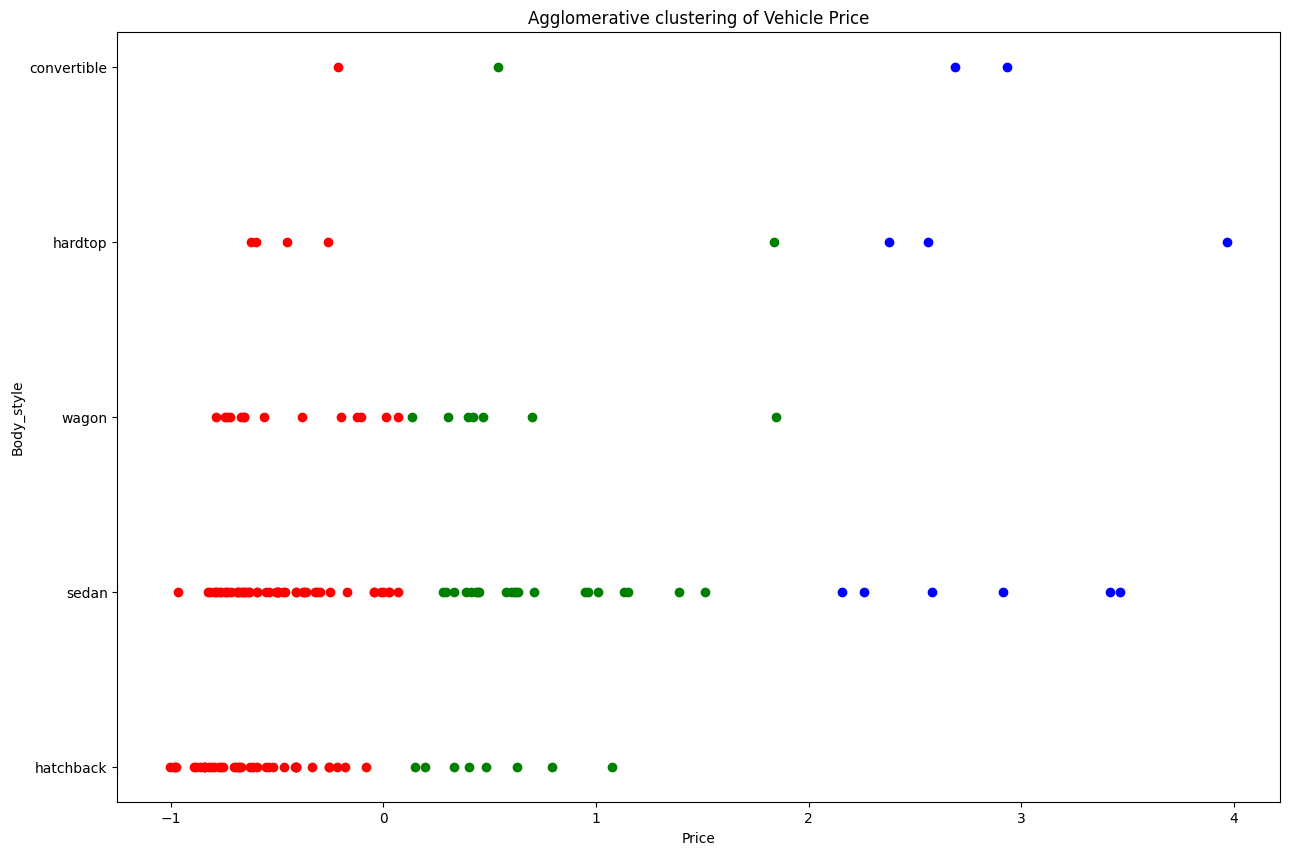

In [39]:
price1 = price[price['Clusters'] == 0]
price2 = price[price['Clusters'] == 1]
price3 = price[price['Clusters'] == 2]
plt.subplots(figsize = ([15,10]))
plt.scatter(price1['Price'],price1['Body_style'],color = 'red')
plt.scatter(price2['Price'],price2['Body_style'],color = 'green')
plt.scatter(price3['Price'],price3['Body_style'],color = 'blue')
plt.title('Agglomerative clustering of Vehicle Price')
plt.xlabel('Price')
plt.ylabel('Body_style')

In [40]:
#Logistic regression model to predict the fuel type of vehicle
#find the attributes that are objects and encode them to numerical attributes before carrting out any logistic regressions
cardata2 = cardata.copy(deep = True)
cardata2

,Body_style,Fuel_type,Make,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
0,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16430
1,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16925
2,sedan,gas,bmw,2,101.2,176.8,64.8,54.3,2710,6,164,3.31,3.19,9.0,121,4250,21,28,20970
3,sedan,gas,bmw,4,101.2,176.8,64.8,54.3,2765,6,164,3.31,3.19,9.0,121,4250,21,28,21105
4,sedan,gas,bmw,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,3.19,9.0,121,4250,20,25,24565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845
151,sedan,gas,volvo,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045
152,sedan,gas,volvo,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485
153,sedan,diesel,volvo,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470


In [41]:
objList = cardata2.select_dtypes(include = "object").columns
print (objList)

Index(['Body_style', 'Fuel_type', 'Make'], dtype='object')


In [42]:
le = LabelEncoder()

for i in objList:
    cardata2[i] = le.fit_transform(cardata2[i].astype(str))

print (cardata2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Body_style         155 non-null    int64  
 1   Fuel_type          155 non-null    int64  
 2   Make               155 non-null    int64  
 3   Doors_num          155 non-null    int64  
 4   Wheelbase          155 non-null    float64
 5   Length             155 non-null    float64
 6   Width              155 non-null    float64
 7   Height             155 non-null    float64
 8   Curb_weight        155 non-null    int64  
 9   Cylinders_num      155 non-null    int64  
 10  Engine_size        155 non-null    int64  
 11  Cyl_bore           155 non-null    float64
 12  Stroke             155 non-null    float64
 13  Compression_ratio  155 non-null    float64
 14  Horsepower         155 non-null    int64  
 15  RPM                155 non-null    int64  
 16  City_mpg           155 non

In [43]:
cardata2.head(20)

,Body_style,Fuel_type,Make,Doors_num,Wheelbase,Length,Width,Height,Curb_weight,Cylinders_num,Engine_size,Cyl_bore,Stroke,Compression_ratio,Horsepower,RPM,City_mpg,Highway_mpg,Price
0,3,1,0,2,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16430
1,3,1,0,4,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.80,8.8,101,5800,23,29,16925
2,3,1,0,2,101.2,176.8,64.8,54.3,2710,6,164,3.31,3.19,9.0,121,4250,21,28,20970
3,3,1,0,4,101.2,176.8,64.8,54.3,2765,6,164,3.31,3.19,9.0,121,4250,21,28,21105
4,3,1,0,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,3.19,9.0,121,4250,20,25,24565
5,3,1,0,4,103.5,189.0,66.9,55.7,3230,6,209,3.62,3.39,8.0,182,5400,16,22,30760
6,3,1,0,2,103.5,193.8,67.9,53.7,3380,6,209,3.62,3.39,8.0,182,5400,16,22,41315
7,3,1,0,4,110.0,197.0,70.9,56.3,3505,6,209,3.62,3.39,8.0,182,5400,15,20,36880
8,2,1,1,2,86.6,144.6,63.9,50.8,1713,4,92,2.91,3.41,9.6,58,4800,49,54,6479
9,2,1,1,2,86.6,144.6,63.9,50.8,1819,4,92,2.91,3.41,9.2,76,6000,31,38,6855


In [44]:
x = cardata2.drop('Fuel_type', axis=1)
y = cardata2['Fuel_type']

In [45]:
x.shape

(155, 18)

In [46]:
#1 equates gas while 0 equates diesel
y.value_counts()

1    135
0     20
Name: Fuel_type, dtype: int64

In [47]:
#using the train test split function, the data is splitted for both training and testing
x_train, x_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.3, random_state=42)
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


 X_train: (108, 18)
 X_test: (47, 18)
 y_train: (108,)
 y_test: (47,)


In [48]:
log_logit = LogisticRegression()
log_logit.fit(x_train, y_train)
pred_clf_logit = log_logit.predict(x_test)
proba_clf_logit = log_logit.predict_proba(x_test)

print(accuracy_score(y_test,pred_clf_logit))
print(classification_report(y_test, pred_clf_logit , labels=[0, 1]))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        36

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



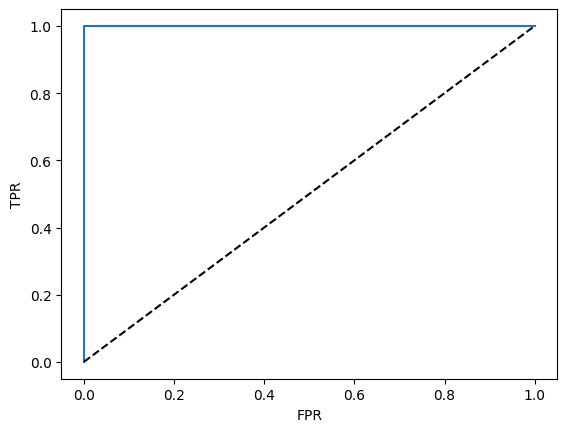

In [49]:
y_pred_proba=proba_clf_logit [:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [50]:
#QDA, LDA and Logistic Regression to classifify vehicles according to their body type
#quadractic discriminant analysis
#splitting our data set
x = cardata2.drop('Body_style', axis=1)
y = cardata2['Body_style']

In [51]:
y.value_counts()

3    76
2    46
4    21
1     8
0     4
Name: Body_style, dtype: int64

In [52]:
#using the train test split function, the data is splitted for both training and testing
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(x), y, test_size=0.2, random_state=0)
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


 X_train: (108, 18)
 X_test: (47, 18)
 y_train: (124,)
 y_test: (31,)


In [53]:
#building the quadratic discriminant analysis model
#model training and testing
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_model.score(X_train, y_train)

0.8629032258064516

In [54]:
#Using the model to predict
yqda_pred = qda_model.predict(X_test)
yqda_pred

array([2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 2,
       3, 4, 4, 2, 3, 3, 3, 3, 2])

In [55]:
#evaluating the accuracy of the model
print(classification_report(y_test, yqda_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      0.55      0.60        11
           3       0.68      0.76      0.72        17
           4       0.33      1.00      0.50         1

    accuracy                           0.65        31
   macro avg       0.42      0.58      0.46        31
weighted avg       0.62      0.65      0.63        31



In [56]:
#linear discriminant analysis
#model training and testing
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_model.score(X_train, y_train)

0.7741935483870968

In [57]:
#Using the model to predict
ylda_pred = lda_model.predict(X_test)
ylda_pred

array([2, 0, 3, 3, 3, 3, 2, 3, 2, 1, 2, 0, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2,
       3, 4, 3, 3, 3, 2, 3, 3, 2])

In [58]:
#evaluating the accuracy of the model
print(classification_report(y_test, ylda_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.50      0.50         2
           2       0.88      0.64      0.74        11
           3       0.78      0.82      0.80        17
           4       0.00      0.00      0.00         1

    accuracy                           0.71        31
   macro avg       0.43      0.39      0.41        31
weighted avg       0.77      0.71      0.73        31



In [59]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
logit_model.score(X_train, y_train)

0.782258064516129

In [60]:
#Using the model to predict
y_logit_pred = logit_model.predict(X_test)
y_logit_pred


array([2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 4, 3, 3, 3, 2, 3, 3, 2])

In [61]:
#evaluating the accuracy of the model
print(classification_report(y_test, y_logit_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.80      0.73      0.76        11
           3       0.79      0.88      0.83        17
           4       0.00      0.00      0.00         1

    accuracy                           0.74        31
   macro avg       0.32      0.32      0.32        31
weighted avg       0.72      0.74      0.73        31

